# Метод градиентного спуска

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from sympy import diff, sin, exp, Derivative
from sympy.abc import x, y 

from sklearn.linear_model import LinearRegression

In [2]:
expr = x*sin(x*x) + 1 

In [3]:
expr.diff(x)

2*x**2*cos(x**2) + sin(x**2)

In [4]:
d = Derivative(expr)

In [5]:
d.doit()

2*x**2*cos(x**2) + sin(x**2)

In [6]:
# Данные
X = np.array([1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53, 1.54,
              1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62,
              1.63, 1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68,  1.69,
              1.70, 1.70, 1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78])
y = np.array([29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0, 30.6,
              30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8,
              32.8, 33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6,
              34.2, 34.8, 35.5, 36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5])

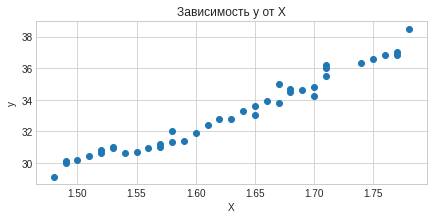

In [7]:
plt.figure(figsize = (7,3))
plt.scatter(X, y)
 
plt.xlabel('X', fontsize = 10)
plt.ylabel('y', fontsize = 10)
plt.title('Зависимость y от X', fontsize = 12)

plt.show()

### Метод наименьших квадратов

In [8]:
X_mean = np.mean(X)
y_mean = np.mean(y)

w = np.sum(((X - X_mean) * (y - y_mean)))/np.sum((X - X_mean) ** 2)
b = y_mean - w * X_mean

print(f'Наклон: {w}', f'Сдвиг: {b}', sep='\n')

Наклон: 26.861812005569757
Сдвиг: -10.57093629978732


### Модель LinearRegression

In [9]:
model = LinearRegression()

In [10]:
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [11]:
model.coef_, model.intercept_

(array([[26.86181201]]), array([-10.5709363]))

### Метод градиентного спуска

In [12]:
def regression(X, w, b):
  """Исходная функция (линейная регрессия)"""
  return w * X + b

In [13]:
def objective(X, y, w, b, n):
  """Функция потерь (half MSE)"""
  return np.sum((y - regression(X, w, b)) ** 2) / (2 * n)

In [14]:
def partial_w(X, y, w, b, n):
  """Частная производная (градиент) функции потерь"""
  return np.sum(-X * (y - (w * X + b))) / n

def partial_b(X, y, w, b, n):
  """Частная производная (градиент) функции потерь"""
  return np.sum(-(y - (w * X + b))) / n

### Алгоритм градиентного спуска

In [15]:
def gradient_descent(X, y, iter, learning_rate):
  """Градиентный спуск"""
  w, b = 0, 0
  n = len(X)
  w_list, b_list, l_list = [], [], []

  for i in range(iter):

    w_list.append(w)
    b_list.append(b)
    l_list.append(objective(X, y, w, b, n))

    par_1 = partial_w(X, y, w, b, n)
    par_2 = partial_b(X, y, w, b, n)

    w = w - learning_rate * par_1
    b = b - learning_rate * par_2

  return w_list, b_list, l_list

### Обучение

In [16]:
w_list, b_list, l_list = gradient_descent(X, y, iter = 350000, learning_rate = 0.01)
print(w_list[-1], b_list[-1])

26.854853898569097 -10.559599278809689


In [17]:
y_pred_gd = regression(X, w_list[-1], b_list[-1])

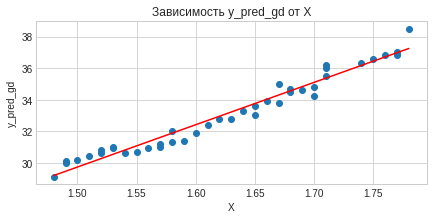

In [18]:
plt.figure(figsize = (7, 3))
plt.scatter(X, y)
plt.plot(X, y_pred_gd, 'r')

plt.xlabel('X', fontsize = 10)
plt.ylabel('y_pred_gd', fontsize = 10)
plt.title('Зависимость y_pred_gd от X', fontsize = 12)
plt.show()